## Introduction to the Interstellar Medium
### Jonathan Williams

### Figures 5.10 and 5.11: Plot Voigt profiles and equivalent width for different tau (curve of growth)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import Gaussian1D, Lorentz1D, Voigt1D
import scipy.integrate as integrate
%matplotlib inline

In [19]:
def voigt():
    # plot a suite of Voigt profiles
    fig = plt.figure(figsize=(8,5))
    ax1 = fig.add_subplot(111)

    x = np.arange(-12, 12, 0.05)
    #g = Gaussian1D(mean=0, amplitude=1, stddev=1/2.355)
    #l = Lorentz1D(x_0=0, amplitude=0.5, fwhm=1)
    v = Voigt1D(x_0=0, amplitude_L=1, fwhm_L=1, fwhm_G=1)
    tau_range = [0.5, 1, 2, 4, 8, 16]
    for tau0 in tau_range:
        ax1.plot(x, np.exp(-(tau0*v(x))), lw=np.sqrt(tau0), color='black', label=str(tau0))
        #ax1.plot(x, np.exp(-(tau0*v(x))), color='black', label=str(tau0))
    ax1.legend(title=r'$\tau_0$')
 
    #ax1.set_xlim(-5.0, 5.0)
    #ax1.set_ylim(-0.5, 8.0)
    ax1.set_xlabel(r'$(\lambda-\lambda_0)/\Delta\lambda$', fontsize=14)
    ax1.set_ylabel(r'$F_\lambda/F_{\rm c}$', fontsize=14)

    plt.tight_layout()
    plt.show()

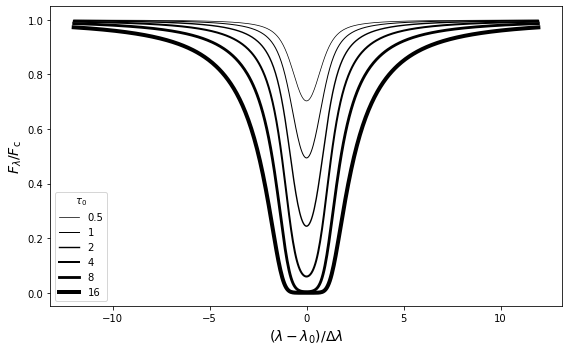

In [20]:
voigt()

In [21]:
def Wlambda(tau):
    # calculate equivalent width of a Voigt profile for a given tau
    x = np.arange(-200, 200, 0.01)
    v = Voigt1D(x_0=0, amplitude_L=50, fwhm_L=0.02, fwhm_G=1)
    vx = v(x)
    W = np.zeros(tau.size)
    for i, tau1 in enumerate(tau):
        F = 1 - np.exp(-(tau1*vx))
        W[i] = integrate.simps(F, x)
        
    return W

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


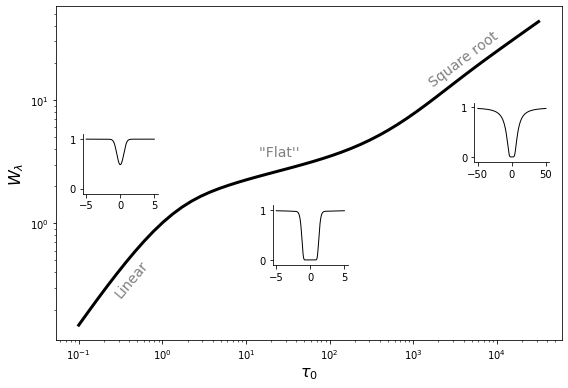

In [22]:
# curve of growth
fig = plt.figure(figsize=(8,5.5))
ax1 = fig.add_subplot(111)

tau = np.logspace(-1,4.5,50)
ax1.plot(tau, Wlambda(tau), 'k-', lw=3)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\tau_0$', fontsize=16)
ax1.set_ylabel(r'$W_\lambda$', fontsize=16)
ax1.text(0.25, 0.25, 'Linear', ha='left', rotation=50, fontsize=14, alpha=0.5)
ax1.text(25, 3.5, "''Flat''", ha='center', fontsize=14, alpha=0.5)
ax1.text(4000, 13, 'Square root', ha='center', rotation=37, fontsize=14, alpha=0.5)

# 
v = Voigt1D(x_0=0, amplitude_L=50, fwhm_L=0.02, fwhm_G=1)
x = np.arange(-5, 5, 0.01)
tau1 = 0.5
ax2 = fig.add_axes([0.15, 0.50, 0.13, 0.15])
ax2.plot(x, np.exp(-(tau1*v(x))), 'k-', lw=1)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_ylim(-0.1,1.1)

tau1 = 30
ax3 = fig.add_axes([0.48, 0.32, 0.13, 0.15])
ax3.plot(x, np.exp(-(tau1*v(x))), 'k-', lw=1)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.set_ylim(-0.1,1.1)

x = np.arange(-50, 50, 0.05)
tau1 = 1e4
ax4 = fig.add_axes([0.83, 0.58, 0.13, 0.15])
ax4.plot(x, np.exp(-(tau1*v(x))), 'k-', lw=1)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
ax4.set_ylim(-0.1,1.1)

plt.tight_layout()
plt.show()